1. Conducting RBF kernel on non-linear data

1. Two Moons dataset

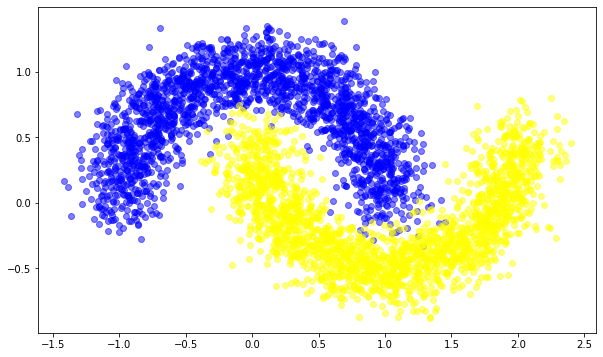

In [51]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
df=pd.read_csv('two_moons.csv')
train_df, val_df = train_test_split(df, test_size=0.20, random_state=42)

# Extracting values for training set
x1_train = train_df['x1'].values
x2_train = train_df['x2'].values
y_train = train_df['y'].values

x1_val = val_df['x1'].values
x2_val = val_df['x2'].values
y_val = val_df['y'].values

plt.figure(figsize=(10,6))
plt.scatter(x1_train[y_train==-1], x2_train[y_train==-1] ,color="blue",alpha=0.5,label='Original Data')
plt.scatter(x1_train[y_train==1], x2_train[y_train==1] ,color="yellow",alpha=0.5,label='Original Data')
    



For C=10 and gamma= 0.01

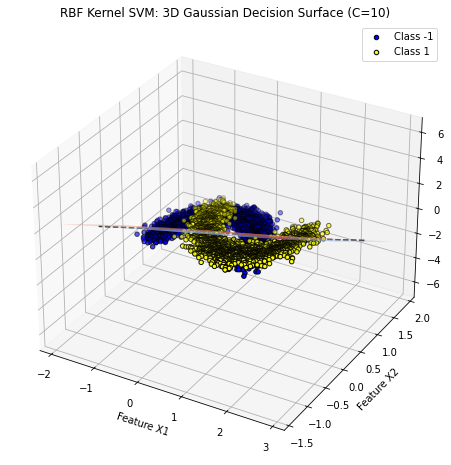

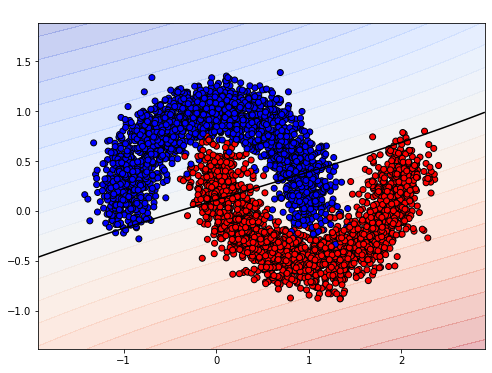

In [52]:
# Loss Function
X_train = np.column_stack((train_df['x1'].values, train_df['x2'].values))
y_train = train_df['y'].values.astype(float)
N = len(y_train)
# kernel='rbf' uses the exact same math you are trying to write
model = SVC(kernel='rbf', C=10,gamma=0.01)
model.fit(X_train, y_train)


# Plotting 3D plot for separating surface
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Create a Mesh Grid to cover the data range
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# 2. Calculate the Decision Function (Z) for the surface
# .decision_function returns the distance to the separating hyperplane
# In RBF, this creates the "hills" and "valleys" around your data points
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 3. Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 2D Gaussian Surface
# We use a colormap (cmap) to show the height of the decision function
surf = ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.7, linewidth=0, antialiased=True)

# 4. Overlay the Original Data Points
# We place the dots at Z=1 and Z=-1 or at their actual decision values
ax.scatter(x1_train[y_train == -1], x2_train[y_train == -1], -1, 
           color="blue", label='Class -1', edgecolors='k')
ax.scatter(x1_train[y_train == 1], x2_train[y_train == 1], 1, 
           color="yellow", label='Class 1', edgecolors='k')

# 5. Add a zero-plane (The actual Decision Boundary)
# The boundary exists where the surface crosses Z=0
ax.contour(xx, yy, Z, levels=[0], colors='black', linestyles='dashed')

# Formatting
ax.set_xlabel('Feature X1')
ax.set_ylabel('Feature X2')
ax.set_zlabel('Decision Score')
ax.set_title(f'RBF Kernel SVM: 3D Gaussian Decision Surface (C=10)')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.3) # The "Surface" from above
plt.contour(xx, yy, Z, levels=[0], colors='black') # The Decision Boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.title("2D RBF Decision Boundary", color='white')
plt.show()


# Creating rotatable 3D figures as iframes
import plotly.graph_objects as go
import numpy as np

# 1. Create the Mesh Grid (same logic as before)
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_range, y_range)

# 2. Calculate Decision Function Values
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 3. Initialize Plotly Figure
fig = go.Figure()

# Add the RBF Surface
fig.add_trace(go.Surface(
    x=x_range, 
    y=y_range, 
    z=Z, 
    colorscale='RdBu', 
    opacity=0.8,
    name='Decision Surface'
))

# 4. Add the Data Points (Class 1)
mask1 = (y_train == 1)
fig.add_trace(go.Scatter3d(
    x=X_train[mask1, 0], y=X_train[mask1, 1], z=np.ones(sum(mask1)),
    mode='markers',
    marker=dict(size=4, color='yellow', line=dict(width=1, color='black')),
    name='Class 1'
))

# Add the Data Points (Class -1)
mask0 = (y_train == -1)
fig.add_trace(go.Scatter3d(
    x=X_train[mask0, 0], y=X_train[mask0, 1], z=-np.ones(sum(mask0)),
    mode='markers',
    marker=dict(size=4, color='blue', line=dict(width=1, color='black')),
    name='Class -1'
))

# 5. Formatting the Layout
fig.update_layout(
    title='Interactive RBF Gaussian Surface',
    scene=dict(
        xaxis_title='Feature X1',
        yaxis_title='Feature X2',
        zaxis_title='Decision Score'
    ),
    width=900,
    height=700,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show(renderer="iframe")

For C=10 and gamma= 1

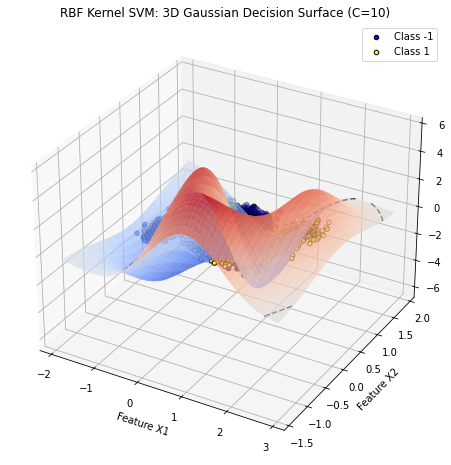

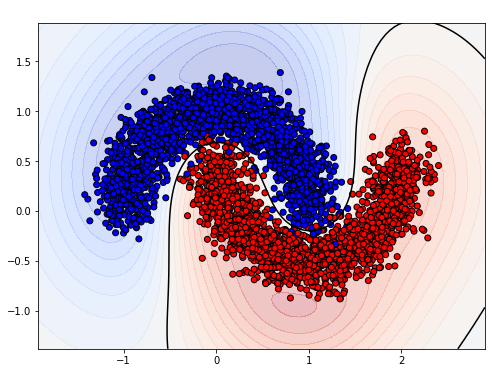

In [53]:
# Loss Function
X_train = np.column_stack((train_df['x1'].values, train_df['x2'].values))
y_train = train_df['y'].values.astype(float)
N = len(y_train)
# kernel='rbf' uses the exact same math you are trying to write
model = SVC(kernel='rbf', C=10,gamma=1)
model.fit(X_train, y_train)


# Plotting 3D plot for separating surface
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Create a Mesh Grid to cover the data range
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# 2. Calculate the Decision Function (Z) for the surface
# .decision_function returns the distance to the separating hyperplane
# In RBF, this creates the "hills" and "valleys" around your data points
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 3. Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 2D Gaussian Surface
# We use a colormap (cmap) to show the height of the decision function
surf = ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.7, linewidth=0, antialiased=True)

# 4. Overlay the Original Data Points
# We place the dots at Z=1 and Z=-1 or at their actual decision values
ax.scatter(x1_train[y_train == -1], x2_train[y_train == -1], -1, 
           color="blue", label='Class -1', edgecolors='k')
ax.scatter(x1_train[y_train == 1], x2_train[y_train == 1], 1, 
           color="yellow", label='Class 1', edgecolors='k')

# 5. Add a zero-plane (The actual Decision Boundary)
# The boundary exists where the surface crosses Z=0
ax.contour(xx, yy, Z, levels=[0], colors='black', linestyles='dashed')

# Formatting
ax.set_xlabel('Feature X1')
ax.set_ylabel('Feature X2')
ax.set_zlabel('Decision Score')
ax.set_title(f'RBF Kernel SVM: 3D Gaussian Decision Surface (C=10)')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.3) # The "Surface" from above
plt.contour(xx, yy, Z, levels=[0], colors='black') # The Decision Boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.title("2D RBF Decision Boundary", color='white')
plt.show()


# Creating rotatable 3D figures as iframes
import plotly.graph_objects as go
import numpy as np

# 1. Create the Mesh Grid (same logic as before)
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_range, y_range)

# 2. Calculate Decision Function Values
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 3. Initialize Plotly Figure
fig = go.Figure()

# Add the RBF Surface
fig.add_trace(go.Surface(
    x=x_range, 
    y=y_range, 
    z=Z, 
    colorscale='RdBu', 
    opacity=0.8,
    name='Decision Surface'
))

# 4. Add the Data Points (Class 1)
mask1 = (y_train == 1)
fig.add_trace(go.Scatter3d(
    x=X_train[mask1, 0], y=X_train[mask1, 1], z=np.ones(sum(mask1)),
    mode='markers',
    marker=dict(size=4, color='yellow', line=dict(width=1, color='black')),
    name='Class 1'
))

# Add the Data Points (Class -1)
mask0 = (y_train == -1)
fig.add_trace(go.Scatter3d(
    x=X_train[mask0, 0], y=X_train[mask0, 1], z=-np.ones(sum(mask0)),
    mode='markers',
    marker=dict(size=4, color='blue', line=dict(width=1, color='black')),
    name='Class -1'
))

# 5. Formatting the Layout
fig.update_layout(
    title='Interactive RBF Gaussian Surface',
    scene=dict(
        xaxis_title='Feature X1',
        yaxis_title='Feature X2',
        zaxis_title='Decision Score'
    ),
    width=900,
    height=700,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show(renderer="iframe")

For C=10 and gamma= 10

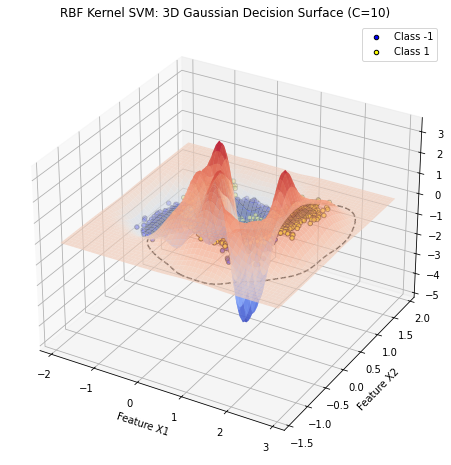

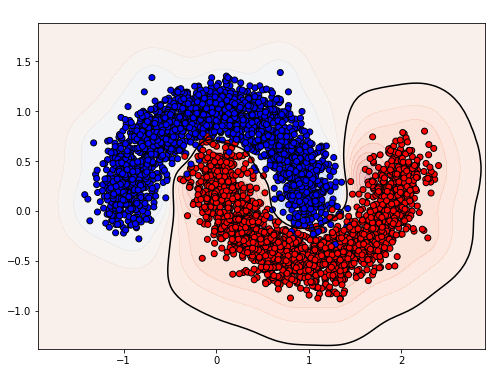

In [54]:
# Loss Function
X_train = np.column_stack((train_df['x1'].values, train_df['x2'].values))
y_train = train_df['y'].values.astype(float)
N = len(y_train)
# kernel='rbf' uses the exact same math you are trying to write
model = SVC(kernel='rbf', C=10,gamma=10)
model.fit(X_train, y_train)


# Plotting 3D plot for separating surface
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Create a Mesh Grid to cover the data range
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# 2. Calculate the Decision Function (Z) for the surface
# .decision_function returns the distance to the separating hyperplane
# In RBF, this creates the "hills" and "valleys" around your data points
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 3. Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 2D Gaussian Surface
# We use a colormap (cmap) to show the height of the decision function
surf = ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.7, linewidth=0, antialiased=True)

# 4. Overlay the Original Data Points
# We place the dots at Z=1 and Z=-1 or at their actual decision values
ax.scatter(x1_train[y_train == -1], x2_train[y_train == -1], -1, 
           color="blue", label='Class -1', edgecolors='k')
ax.scatter(x1_train[y_train == 1], x2_train[y_train == 1], 1, 
           color="yellow", label='Class 1', edgecolors='k')

# 5. Add a zero-plane (The actual Decision Boundary)
# The boundary exists where the surface crosses Z=0
ax.contour(xx, yy, Z, levels=[0], colors='black', linestyles='dashed')

# Formatting
ax.set_xlabel('Feature X1')
ax.set_ylabel('Feature X2')
ax.set_zlabel('Decision Score')
ax.set_title(f'RBF Kernel SVM: 3D Gaussian Decision Surface (C=10)')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.3) # The "Surface" from above
plt.contour(xx, yy, Z, levels=[0], colors='black') # The Decision Boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.title("2D RBF Decision Boundary", color='white')
plt.show()


# Creating rotatable 3D figures as iframes
import plotly.graph_objects as go
import numpy as np

# 1. Create the Mesh Grid (same logic as before)
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_range, y_range)

# 2. Calculate Decision Function Values
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 3. Initialize Plotly Figure
fig = go.Figure()

# Add the RBF Surface
fig.add_trace(go.Surface(
    x=x_range, 
    y=y_range, 
    z=Z, 
    colorscale='RdBu', 
    opacity=0.8,
    name='Decision Surface'
))

# 4. Add the Data Points (Class 1)
mask1 = (y_train == 1)
fig.add_trace(go.Scatter3d(
    x=X_train[mask1, 0], y=X_train[mask1, 1], z=np.ones(sum(mask1)),
    mode='markers',
    marker=dict(size=4, color='yellow', line=dict(width=1, color='black')),
    name='Class 1'
))

# Add the Data Points (Class -1)
mask0 = (y_train == -1)
fig.add_trace(go.Scatter3d(
    x=X_train[mask0, 0], y=X_train[mask0, 1], z=-np.ones(sum(mask0)),
    mode='markers',
    marker=dict(size=4, color='blue', line=dict(width=1, color='black')),
    name='Class -1'
))

# 5. Formatting the Layout
fig.update_layout(
    title='Interactive RBF Gaussian Surface',
    scene=dict(
        xaxis_title='Feature X1',
        yaxis_title='Feature X2',
        zaxis_title='Decision Score'
    ),
    width=900,
    height=700,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show(renderer="iframe")

1. Validation on the validation data extract of Two Moons and plotting graph of Validation error vs values of C and gamma 

In [55]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

# 1. Setup the Parameters and Grid
C_values = [0.001,0.01,0.1, 1, 10, 100]
gamma_values = [0.0001,0.01,0.01, 0.1, 1, 10]

# Initialize matrix to store validation errors (Shape: Rows=Gamma, Cols=C)
error_matrix = np.zeros((len(gamma_values), len(C_values)))
X_val = np.column_stack((val_df['x1'].values, val_df['x2'].values))

# 2. Perform Grid Search
# IMPORTANT: Fit on X_train/y_train, evaluate on X_val/y_val
for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        # Initialize and Train SVM with RBF Kernel
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_val, y_val)  # Train on Validation Set
        
        # Predict on Validation Set
        y_val_pred = model.predict(X_val)
        
        # Calculate Validation Error (1 - Accuracy)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        error_matrix[i, j] = 1 - val_accuracy

# 3. 3D Plotting with Plotly
# Log-scale transformation for better visualization
log_C = np.log10(C_values)
log_gamma = np.log10(gamma_values)

fig = go.Figure(data=[go.Surface(
    z=error_matrix,             # The height of the surface (Error)
    x=log_C,                    # X-axis (log C)
    y=log_gamma,                # Y-axis (log Gamma)
    colorscale='Viridis',       # Color theme
    colorbar_title='Val Error'
)])

# 4. Layout and Formatting
fig.update_layout(
    title='Task 2: 3D Validation Error Surface',
    scene=dict(
        xaxis_title='log10(C)',
        yaxis_title='log10(gamma)',
        zaxis_title='Validation Error',
        xaxis=dict(tickvals=log_C, ticktext=C_values), # Show real C values on axis
        yaxis=dict(tickvals=log_gamma, ticktext=gamma_values) # Show real Gamma values
    ),
    width=900,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show(renderer='iframe')
# 1. Find the flat index of the minimum error, then convert to (row, col)
# error_matrix.shape is (len(gamma_values), len(C_values))
min_idx = np.unravel_index(np.argmin(error_matrix), error_matrix.shape)

# 2. Extract the values using square brackets []
best_gamma = gamma_values[min_idx[0]]
best_C = C_values[min_idx[1]]
lowest_error = error_matrix[min_idx]

print(f"Lowest Validation Error: {lowest_error:.4f}")
print(f"The values of C and gamma for which validation error is lowest: C={best_C}, gamma={best_gamma}")

Lowest Validation Error: 0.0030
The values of C and gamma for which validation error is lowest: C=100, gamma=10


For Concentric Circle Dataset

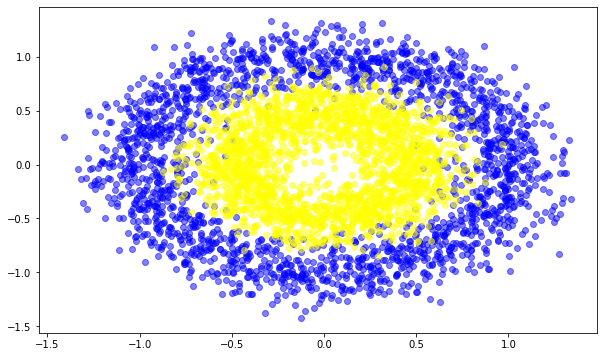

In [56]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
df=pd.read_csv('concentric_circles.csv')
train_df, val_df = train_test_split(df, test_size=0.20, random_state=42)

# Extracting values for training set
x1_train = train_df['x1'].values
x2_train = train_df['x2'].values
y_train = train_df['y'].values

x1_val = val_df['x1'].values
x2_val = val_df['x2'].values
y_val = val_df['y'].values

plt.figure(figsize=(10,6))
plt.scatter(x1_train[y_train==-1], x2_train[y_train==-1] ,color="blue",alpha=0.5,label='Original Data')
plt.scatter(x1_train[y_train==1], x2_train[y_train==1] ,color="yellow",alpha=0.5,label='Original Data')
    



For C=10 and gamma= 0.01

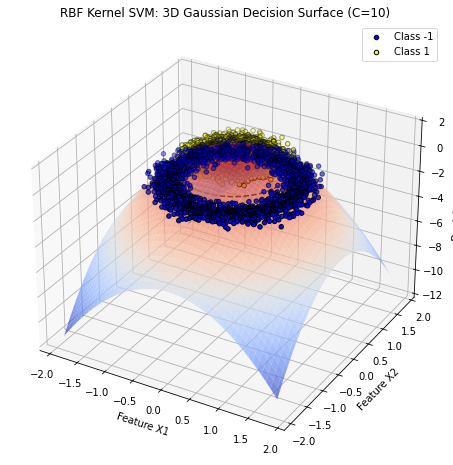

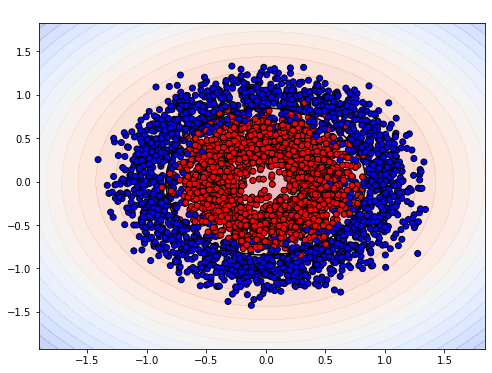

In [57]:
# Loss Function
X_train = np.column_stack((train_df['x1'].values, train_df['x2'].values))
y_train = train_df['y'].values.astype(float)
N = len(y_train)
# kernel='rbf' uses the exact same math you are trying to write
model = SVC(kernel='rbf', C=10,gamma=0.01)
model.fit(X_train, y_train)


# Plotting 3D plot for separating surface
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Create a Mesh Grid to cover the data range
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# 2. Calculate the Decision Function (Z) for the surface
# .decision_function returns the distance to the separating hyperplane
# In RBF, this creates the "hills" and "valleys" around your data points
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 3. Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 2D Gaussian Surface
# We use a colormap (cmap) to show the height of the decision function
surf = ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.7, linewidth=0, antialiased=True)

# 4. Overlay the Original Data Points
# We place the dots at Z=1 and Z=-1 or at their actual decision values
ax.scatter(x1_train[y_train == -1], x2_train[y_train == -1], -1, 
           color="blue", label='Class -1', edgecolors='k')
ax.scatter(x1_train[y_train == 1], x2_train[y_train == 1], 1, 
           color="yellow", label='Class 1', edgecolors='k')

# 5. Add a zero-plane (The actual Decision Boundary)
# The boundary exists where the surface crosses Z=0
ax.contour(xx, yy, Z, levels=[0], colors='black', linestyles='dashed')

# Formatting
ax.set_xlabel('Feature X1')
ax.set_ylabel('Feature X2')
ax.set_zlabel('Decision Score')
ax.set_title(f'RBF Kernel SVM: 3D Gaussian Decision Surface (C=10)')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.3) # The "Surface" from above
plt.contour(xx, yy, Z, levels=[0], colors='black') # The Decision Boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.title("2D RBF Decision Boundary", color='white')
plt.show()


# Creating rotatable 3D figures as iframes
import plotly.graph_objects as go
import numpy as np

# 1. Create the Mesh Grid (same logic as before)
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_range, y_range)

# 2. Calculate Decision Function Values
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 3. Initialize Plotly Figure
fig = go.Figure()

# Add the RBF Surface
fig.add_trace(go.Surface(
    x=x_range, 
    y=y_range, 
    z=Z, 
    colorscale='RdBu', 
    opacity=0.8,
    name='Decision Surface'
))

# 4. Add the Data Points (Class 1)
mask1 = (y_train == 1)
fig.add_trace(go.Scatter3d(
    x=X_train[mask1, 0], y=X_train[mask1, 1], z=np.ones(sum(mask1)),
    mode='markers',
    marker=dict(size=4, color='yellow', line=dict(width=1, color='black')),
    name='Class 1'
))

# Add the Data Points (Class -1)
mask0 = (y_train == -1)
fig.add_trace(go.Scatter3d(
    x=X_train[mask0, 0], y=X_train[mask0, 1], z=-np.ones(sum(mask0)),
    mode='markers',
    marker=dict(size=4, color='blue', line=dict(width=1, color='black')),
    name='Class -1'
))

# 5. Formatting the Layout
fig.update_layout(
    title='Interactive RBF Gaussian Surface',
    scene=dict(
        xaxis_title='Feature X1',
        yaxis_title='Feature X2',
        zaxis_title='Decision Score'
    ),
    width=900,
    height=700,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show(renderer="iframe")

For C=10 and gamma= 1

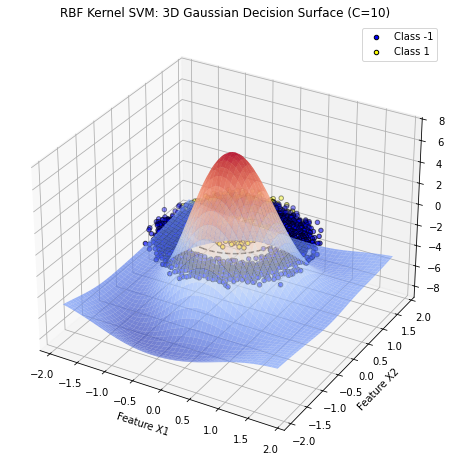

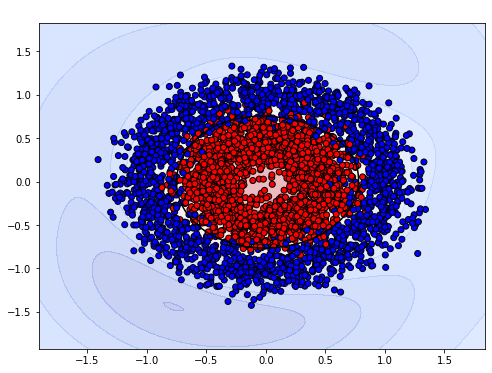

In [58]:
# Loss Function
X_train = np.column_stack((train_df['x1'].values, train_df['x2'].values))
y_train = train_df['y'].values.astype(float)
N = len(y_train)
# kernel='rbf' uses the exact same math you are trying to write
model = SVC(kernel='rbf', C=10,gamma=1)
model.fit(X_train, y_train)


# Plotting 3D plot for separating surface
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Create a Mesh Grid to cover the data range
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# 2. Calculate the Decision Function (Z) for the surface
# .decision_function returns the distance to the separating hyperplane
# In RBF, this creates the "hills" and "valleys" around your data points
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 3. Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 2D Gaussian Surface
# We use a colormap (cmap) to show the height of the decision function
surf = ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.7, linewidth=0, antialiased=True)

# 4. Overlay the Original Data Points
# We place the dots at Z=1 and Z=-1 or at their actual decision values
ax.scatter(x1_train[y_train == -1], x2_train[y_train == -1], -1, 
           color="blue", label='Class -1', edgecolors='k')
ax.scatter(x1_train[y_train == 1], x2_train[y_train == 1], 1, 
           color="yellow", label='Class 1', edgecolors='k')

# 5. Add a zero-plane (The actual Decision Boundary)
# The boundary exists where the surface crosses Z=0
ax.contour(xx, yy, Z, levels=[0], colors='black', linestyles='dashed')

# Formatting
ax.set_xlabel('Feature X1')
ax.set_ylabel('Feature X2')
ax.set_zlabel('Decision Score')
ax.set_title(f'RBF Kernel SVM: 3D Gaussian Decision Surface (C=10)')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.3) # The "Surface" from above
plt.contour(xx, yy, Z, levels=[0], colors='black') # The Decision Boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.title("2D RBF Decision Boundary", color='white')
plt.show()


# Creating rotatable 3D figures as iframes
import plotly.graph_objects as go
import numpy as np

# 1. Create the Mesh Grid (same logic as before)
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_range, y_range)

# 2. Calculate Decision Function Values
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 3. Initialize Plotly Figure
fig = go.Figure()

# Add the RBF Surface
fig.add_trace(go.Surface(
    x=x_range, 
    y=y_range, 
    z=Z, 
    colorscale='RdBu', 
    opacity=0.8,
    name='Decision Surface'
))

# 4. Add the Data Points (Class 1)
mask1 = (y_train == 1)
fig.add_trace(go.Scatter3d(
    x=X_train[mask1, 0], y=X_train[mask1, 1], z=np.ones(sum(mask1)),
    mode='markers',
    marker=dict(size=4, color='yellow', line=dict(width=1, color='black')),
    name='Class 1'
))

# Add the Data Points (Class -1)
mask0 = (y_train == -1)
fig.add_trace(go.Scatter3d(
    x=X_train[mask0, 0], y=X_train[mask0, 1], z=-np.ones(sum(mask0)),
    mode='markers',
    marker=dict(size=4, color='blue', line=dict(width=1, color='black')),
    name='Class -1'
))

# 5. Formatting the Layout
fig.update_layout(
    title='Interactive RBF Gaussian Surface',
    scene=dict(
        xaxis_title='Feature X1',
        yaxis_title='Feature X2',
        zaxis_title='Decision Score'
    ),
    width=900,
    height=700,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show(renderer="iframe")

For C=10 and gamma= 10

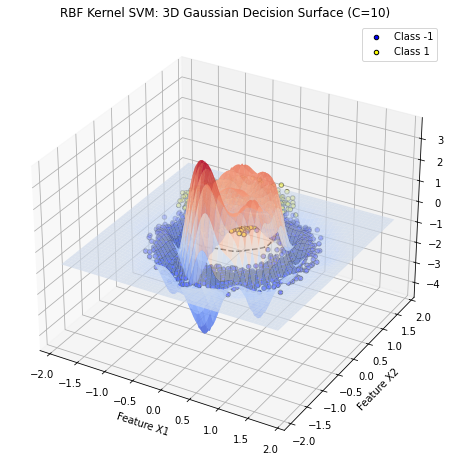

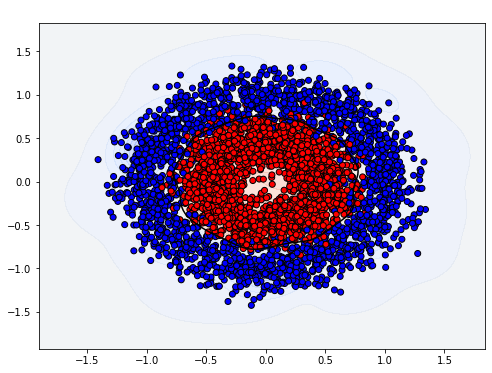

In [59]:
# Loss Function
X_train = np.column_stack((train_df['x1'].values, train_df['x2'].values))
y_train = train_df['y'].values.astype(float)
N = len(y_train)
# kernel='rbf' uses the exact same math you are trying to write
model = SVC(kernel='rbf', C=10,gamma=10)
model.fit(X_train, y_train)


# Plotting 3D plot for separating surface
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Create a Mesh Grid to cover the data range
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# 2. Calculate the Decision Function (Z) for the surface
# .decision_function returns the distance to the separating hyperplane
# In RBF, this creates the "hills" and "valleys" around your data points
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 3. Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 2D Gaussian Surface
# We use a colormap (cmap) to show the height of the decision function
surf = ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.7, linewidth=0, antialiased=True)

# 4. Overlay the Original Data Points
# We place the dots at Z=1 and Z=-1 or at their actual decision values
ax.scatter(x1_train[y_train == -1], x2_train[y_train == -1], -1, 
           color="blue", label='Class -1', edgecolors='k')
ax.scatter(x1_train[y_train == 1], x2_train[y_train == 1], 1, 
           color="yellow", label='Class 1', edgecolors='k')

# 5. Add a zero-plane (The actual Decision Boundary)
# The boundary exists where the surface crosses Z=0
ax.contour(xx, yy, Z, levels=[0], colors='black', linestyles='dashed')

# Formatting
ax.set_xlabel('Feature X1')
ax.set_ylabel('Feature X2')
ax.set_zlabel('Decision Score')
ax.set_title(f'RBF Kernel SVM: 3D Gaussian Decision Surface (C=10)')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=20, cmap='coolwarm', alpha=0.3) # The "Surface" from above
plt.contour(xx, yy, Z, levels=[0], colors='black') # The Decision Boundary
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')
plt.title("2D RBF Decision Boundary", color='white')
plt.show()


# Creating rotatable 3D figures as iframes
import plotly.graph_objects as go
import numpy as np

# 1. Create the Mesh Grid (same logic as before)
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(x_range, y_range)

# 2. Calculate Decision Function Values
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.decision_function(grid_points)
Z = Z.reshape(xx.shape)

# 3. Initialize Plotly Figure
fig = go.Figure()

# Add the RBF Surface
fig.add_trace(go.Surface(
    x=x_range, 
    y=y_range, 
    z=Z, 
    colorscale='RdBu', 
    opacity=0.8,
    name='Decision Surface'
))

# 4. Add the Data Points (Class 1)
mask1 = (y_train == 1)
fig.add_trace(go.Scatter3d(
    x=X_train[mask1, 0], y=X_train[mask1, 1], z=np.ones(sum(mask1)),
    mode='markers',
    marker=dict(size=4, color='yellow', line=dict(width=1, color='black')),
    name='Class 1'
))

# Add the Data Points (Class -1)
mask0 = (y_train == -1)
fig.add_trace(go.Scatter3d(
    x=X_train[mask0, 0], y=X_train[mask0, 1], z=-np.ones(sum(mask0)),
    mode='markers',
    marker=dict(size=4, color='blue', line=dict(width=1, color='black')),
    name='Class -1'
))

# 5. Formatting the Layout
fig.update_layout(
    title='Interactive RBF Gaussian Surface',
    scene=dict(
        xaxis_title='Feature X1',
        yaxis_title='Feature X2',
        zaxis_title='Decision Score'
    ),
    width=900,
    height=700,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show(renderer="iframe")

1. Valiadation on validation data of Two Concentric Circles data and plotting Valodation error vs C values and gamma values

In [60]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

# 1. Setup the Parameters and Grid
C_values = [0.001,0.01,0.1, 1, 10, 100]
gamma_values = [0.0001,0.01,0.01, 0.1, 1, 10]

# Initialize matrix to store validation errors (Shape: Rows=Gamma, Cols=C)
error_matrix = np.zeros((len(gamma_values), len(C_values)))
X_val = np.column_stack((val_df['x1'].values, val_df['x2'].values))

# 2. Perform Grid Search
# IMPORTANT: Fit on X_train/y_train, evaluate on X_val/y_val
for i, gamma in enumerate(gamma_values):
    for j, C in enumerate(C_values):
        # Initialize and Train SVM with RBF Kernel
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_val, y_val)  # Train on Validation Set
        
        # Predict on Validation Set
        y_val_pred = model.predict(X_val)
        
        # Calculate Validation Error (1 - Accuracy)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        error_matrix[i, j] = 1 - val_accuracy

# 3. 3D Plotting with Plotly
# Log-scale transformation for better visualization
log_C = np.log10(C_values)
log_gamma = np.log10(gamma_values)

fig = go.Figure(data=[go.Surface(
    z=error_matrix,             # The height of the surface (Error)
    x=log_C,                    # X-axis (log C)
    y=log_gamma,                # Y-axis (log Gamma)
    colorscale='Viridis',       # Color theme
    colorbar_title='Val Error'
)])

# 4. Layout and Formatting
fig.update_layout(
    title='Task 2: 3D Validation Error Surface',
    scene=dict(
        xaxis_title='log10(C)',
        yaxis_title='log10(gamma)',
        zaxis_title='Validation Error',
        xaxis=dict(tickvals=log_C, ticktext=C_values), # Show real C values on axis
        yaxis=dict(tickvals=log_gamma, ticktext=gamma_values) # Show real Gamma values
    ),
    width=900,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90)
)

fig.show(renderer='iframe')
# 1. Find the flat index of the minimum error, then convert to (row, col)
# error_matrix.shape is (len(gamma_values), len(C_values))
min_idx = np.unravel_index(np.argmin(error_matrix), error_matrix.shape)

# 2. Extract the values using square brackets []
best_gamma = gamma_values[min_idx[0]]
best_C = C_values[min_idx[1]]
lowest_error = error_matrix[min_idx]

print(f"Lowest Validation Error: {lowest_error:.4f}")
print(f"The values of C and gamma for which validation error is lowest: C={best_C}, gamma={best_gamma}")

Lowest Validation Error: 0.0260
The values of C and gamma for which validation error is lowest: C=100, gamma=10


1. Trying Polynomial kernels on the above two Datasets

Intercept (b): [5.11726707]
Support Vectors Count: 490


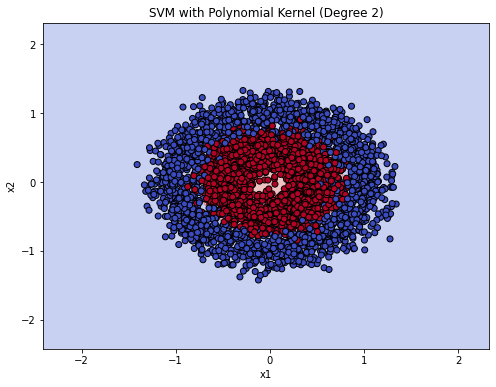

In [49]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('concentric_circles.csv')
train_df, val_df = train_test_split(df, test_size=0.20, random_state=42)

# Extracting values for training set
x1_train = train_df['x1'].values
x2_train = train_df['x2'].values
y_train = train_df['y'].values

x1_val = val_df['x1'].values
x2_val = val_df['x2'].values
y_val = val_df['y'].values

# 1. Prepare Data
X_train = np.column_stack((train_df['x1'].values, train_df['x2'].values))
y_train = train_df['y'].values.astype(float)

# 2. Implement Polynomial Kernel
# degree: The power of the polynomial (e.g., 2 for quadratic, 3 for cubic)
# coef0: The 'constant' term in the kernel formula (K = (gamma*u*v + coef0)^degree)
# It is very important for poly kernels to prevent the model from ignoring lower-order terms.
model = SVC(kernel='poly', degree=2, C=10, gamma=1, coef0=1)
model.fit(X_train, y_train)

# 3. Accessing Parameters
# Note: model.coef_ will raise an error for non-linear kernels
print("Intercept (b):", model.intercept_)
print("Support Vectors Count:", len(model.support_vectors_))

# 4. Visualization (Decision Boundary)
# Since the boundary is non-linear, we plot it using a contour
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title(f"SVM with Polynomial Kernel (Degree {model.degree})")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()